Diabetes dataset is a observative data taken from the pregnant women. We going to predict the outcome, which is the target variable.

In [92]:
from google.colab import files
upload=files.upload()

Saving diabetes.csv to diabetes (3).csv


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [94]:
df=pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Text(0.5, 1.0, 'Pregnancy VS BMI')

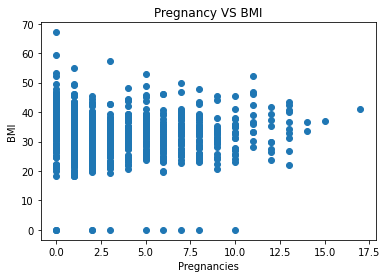

In [ ]:
plt.scatter(df['Pregnancies'],df['BMI'])
plt.xlabel('Pregnancies')
plt.ylabel('BMI')
plt.title('Pregnancy VS BMI')

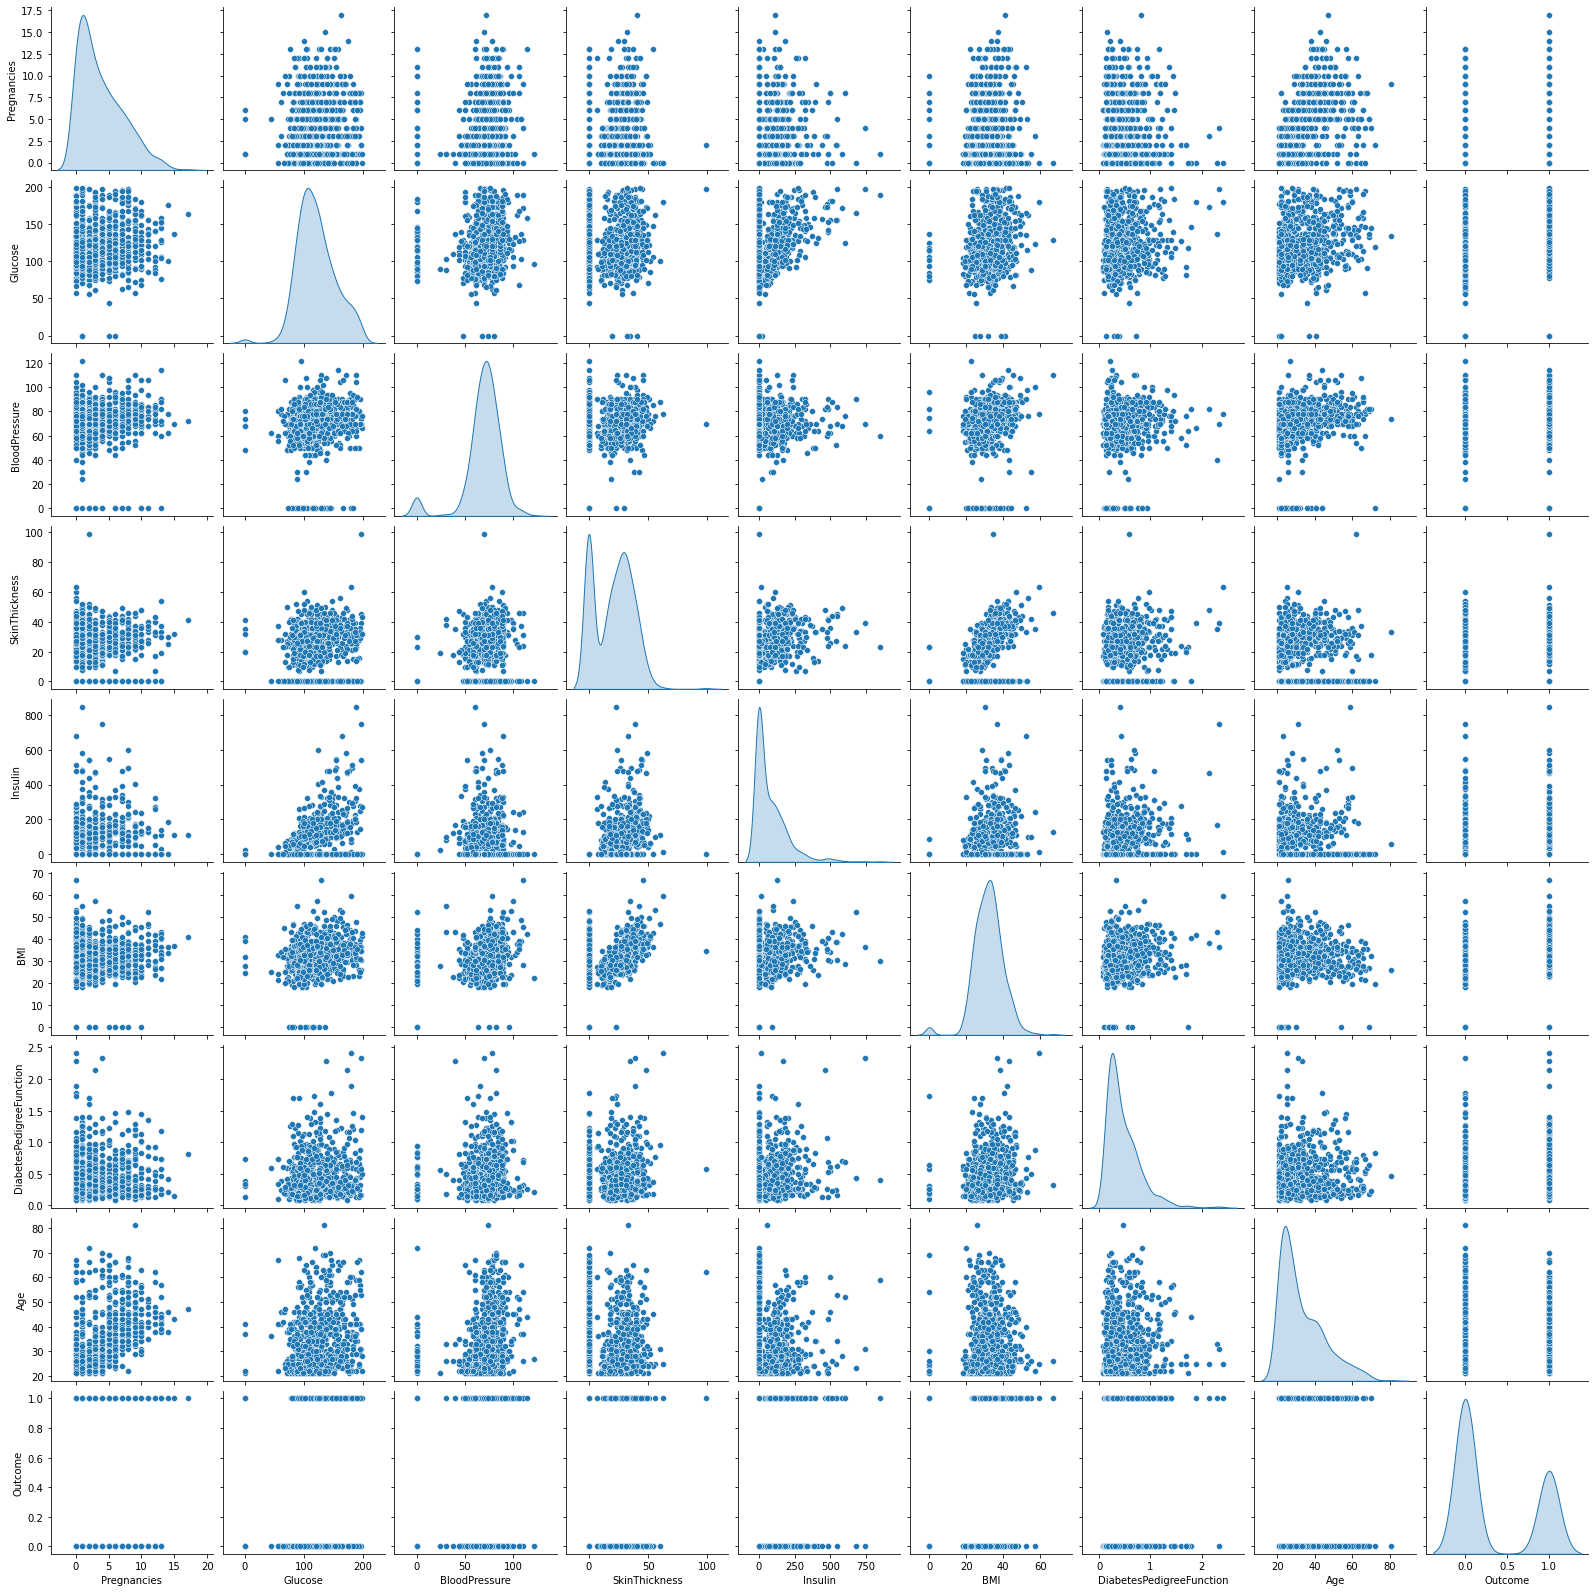

In [ ]:
sns.pairplot(df,diag_kind='kde')

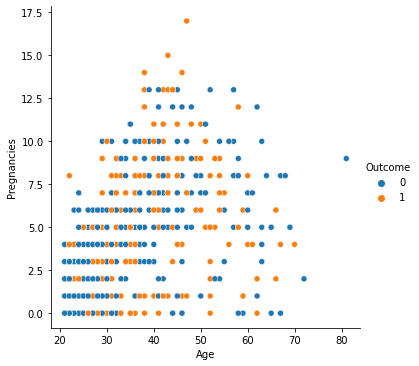

In [ ]:
sns.relplot(x='Age',y='Pregnancies',hue='Outcome',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


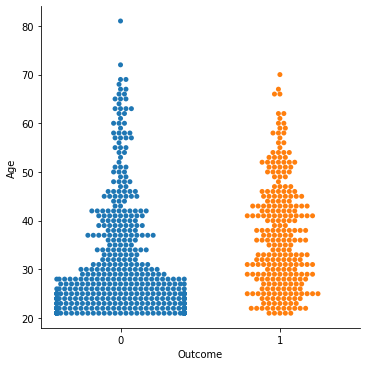

In [ ]:
sns.catplot(x='Outcome',y='Age',kind='swarm',data=df)

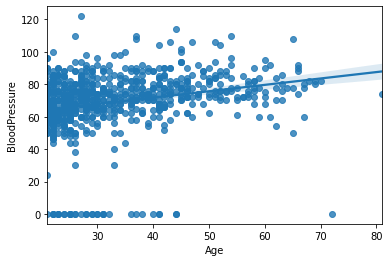

In [ ]:
sns.regplot(x='Age',y='BloodPressure',data=df)

In the above plot we can see the Blood pressure rate of woman at each age.

In [ ]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
KNeighborsClassifier()
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(y_test,y_pred)

array([[82, 18],
       [27, 27]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



Here for the above KNeighborsClassifier algorithm we got 77% accuracy of n_neighbors 5. We can check whether we will get higher accuracy if we change nearest neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=4)
classifier.fit(x_train,y_train)
KNeighborsClassifier()
y_pred=classifier.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       100
           1       0.67      0.37      0.48        54

    accuracy                           0.71       154
   macro avg       0.70      0.64      0.64       154
weighted avg       0.71      0.71      0.69       154



Here we got the accuracy of 72%. So the nearest neighbor 5 is a better value than 4. We can use the other algorithm as follows to check whether we can get better accuracy.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc=dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


In [ ]:
!pip install graphviz

!pip install pydotplus

In [ ]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
df1=pd.read_csv('diabetes.csv', header=None,names=col_names)
df1.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
feature_cols=['pregnant','insulin','bmi','age','glucose','bp','pedigree','age']
x=df1[feature_cols]
y=df1.label

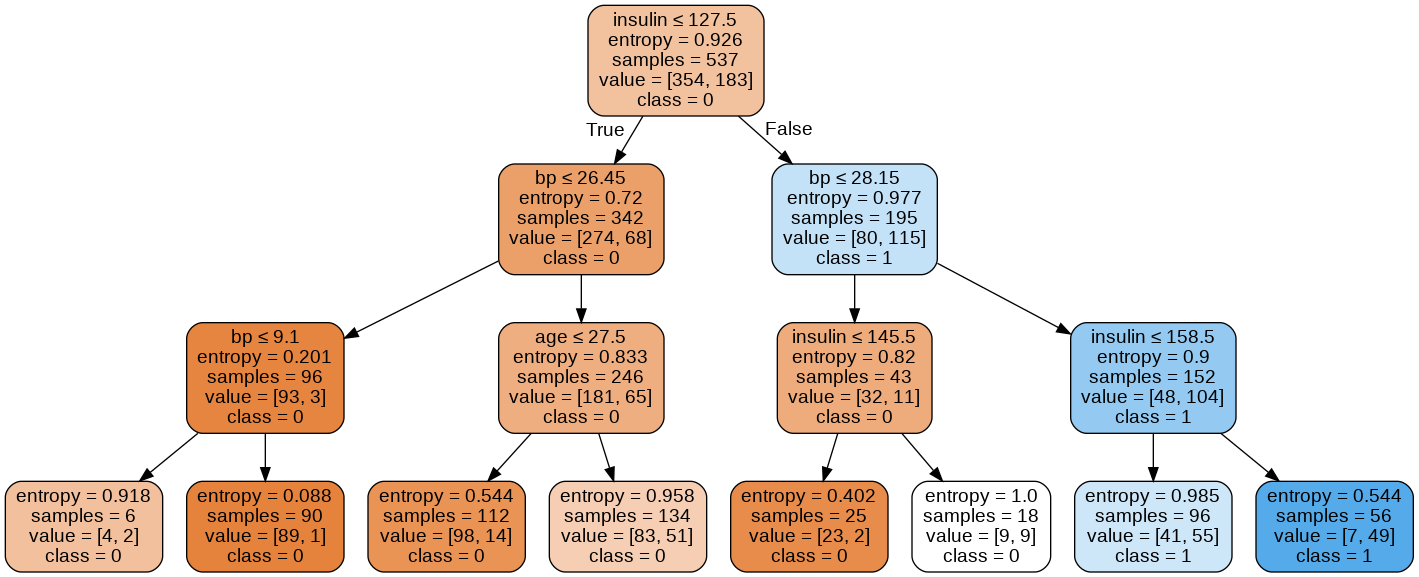

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
dtc=DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtc=dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


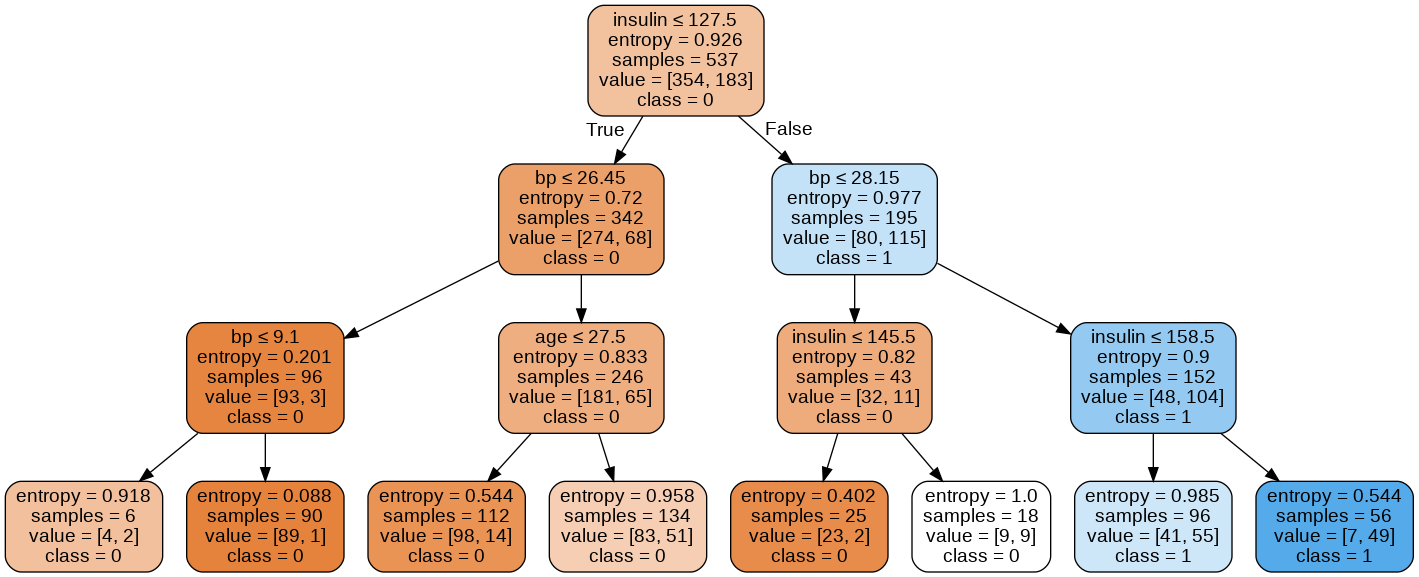

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Conclusion: In this Diabetes dataset we got various accuracy. we can consider the algorithm with higher accuracy.